# Notebook 1: E-GMD Dataset Exploration & Subsetting Strategy

**Objective:** Explore the structure and metadata of the Expanded Groove MIDI Dataset (E-GMD) to understand its characteristics and devise a strategy for creating a manageable, representative subset for model development.

## 1. Setup and Imports

In [1]:
import pandas as pd
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
import typing

In [2]:
# Configure plots
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

## 2. Define Dataset Path

Specify the relative path to the root directory where the E-GMD dataset was extracted.

In [3]:
# Define the path relative to the notebooks directory
DATASET_PATH: Path = Path("../data/raw/e-gmd-v1.0.0/")

In [4]:
# Verify the path exists
if not DATASET_PATH.exists():
    print(f"Error: Dataset path not found at {DATASET_PATH.resolve()}")
else:
    print(f"Dataset path found: {DATASET_PATH.resolve()}")

Dataset path found: /home/ivan/uni/APPSA/DrumScribe-AI/data/raw/e-gmd-v1.0.0


## 3. Load Metadata

Load the main metadata file (`e-gmd-v1.0.0.csv`) into a pandas DataFrame.

In [5]:
METADATA_FILE: Path = DATASET_PATH / "e-gmd-v1.0.0.csv"

In [6]:
if not METADATA_FILE.exists():
    print(f"Error: Metadata file not found at {METADATA_FILE.resolve()}")
else:
    print(f"Loading metadata from: {METADATA_FILE.resolve()}")
    try:
        metadata_df: pd.DataFrame = pd.read_csv(METADATA_FILE)
        print("Metadata loaded successfully.")
    except Exception as e:
        print(f"Error loading metadata: {e}")
        metadata_df = pd.DataFrame() # Assign empty df on error

Loading metadata from: /home/ivan/uni/APPSA/DrumScribe-AI/data/raw/e-gmd-v1.0.0/e-gmd-v1.0.0.csv
Metadata loaded successfully.


## 4. Explore Metadata

Perform initial exploration of the metadata to understand the available fields, data types, and distributions.

### 4.1. Basic Information

In [7]:
if not metadata_df.empty:
    print("First 5 rows:")
    display(metadata_df.head())
    print("\nDataFrame Info:")
    metadata_df.info()
else:
    print("Metadata DataFrame is empty, skipping exploration.")

First 5 rows:


,drummer,session,id,style,bpm,beat_type,time_signature,duration,split,midi_filename,audio_filename,kit_name
0,drummer1,drummer1/eval_session,drummer1/eval_session/1,funk/groove1,138,beat,4-4,27.8261,test,drummer1/eval_session/1_funk-groove1_138_beat_...,drummer1/eval_session/1_funk-groove1_138_beat_...,Acoustic Kit
1,drummer1,drummer1/eval_session,drummer1/eval_session/1,funk/groove1,138,beat,4-4,27.8261,test,drummer1/eval_session/1_funk-groove1_138_beat_...,drummer1/eval_session/1_funk-groove1_138_beat_...,JingleStacks (2nd Hi-Hat)
2,drummer1,drummer1/eval_session,drummer1/eval_session/1,funk/groove1,138,beat,4-4,27.8261,test,drummer1/eval_session/1_funk-groove1_138_beat_...,drummer1/eval_session/1_funk-groove1_138_beat_...,Studio (Live Room)
3,drummer1,drummer1/eval_session,drummer1/eval_session/1,funk/groove1,138,beat,4-4,27.8261,test,drummer1/eval_session/1_funk-groove1_138_beat_...,drummer1/eval_session/1_funk-groove1_138_beat_...,Classic Rock
4,drummer1,drummer1/eval_session,drummer1/eval_session/1,funk/groove1,138,beat,4-4,27.8261,test,drummer1/eval_session/1_funk-groove1_138_beat_...,drummer1/eval_session/1_funk-groove1_138_beat_...,Jazz Funk



DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45537 entries, 0 to 45536
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   drummer         45537 non-null  object 
 1   session         45537 non-null  object 
 2   id              45537 non-null  object 
 3   style           45537 non-null  object 
 4   bpm             45537 non-null  int64  
 5   beat_type       45537 non-null  object 
 6   time_signature  45537 non-null  object 
 7   duration        45537 non-null  float64
 8   split           45537 non-null  object 
 9   midi_filename   45537 non-null  object 
 10  audio_filename  45537 non-null  object 
 11  kit_name        45537 non-null  object 
dtypes: float64(1), int64(1), object(10)
memory usage: 4.2+ MB


### 4.2. Descriptive Statistics (Numerical Columns)

In [8]:
if not metadata_df.empty:
    print("Descriptive Statistics:")
    display(metadata_df.describe())
else:
    print("Metadata DataFrame is empty, skipping statistics.")

Descriptive Statistics:


,bpm,duration
count,45537.000000,45537.000000
mean,109.805477,35.140608
std,23.992195,66.746390
min,50.000000,0.669841
25%,95.000000,2.068957
50%,110.000000,3.502789
75%,125.000000,36.179592
max,290.000000,611.754989


### 4.3. Value Counts (Categorical Columns)

Examine the distribution of key categorical features like `drummer`, `session`, `style`, and `time_signature`.

In [9]:
if not metadata_df.empty:
    categorical_cols: typing.List[str] = ['drummer', 'session', 'style', 'time_signature', 'split']
    for col in categorical_cols:
        if col in metadata_df.columns:
            print(f"\n--- Value Counts for '{col}' ---")
            print(metadata_df[col].value_counts())
        else:
            print(f"\nColumn '{col}' not found in metadata.")
else:
    print("Metadata DataFrame is empty, skipping value counts.")


--- Value Counts for 'drummer' ---
drummer
drummer1     20726
drummer7     14018
drummer3      4171
drummer5      2322
drummer8      1591
drummer9      1290
drummer6       645
drummer10      387
drummer4       387
Name: count, dtype: int64

--- Value Counts for 'session' ---
session
drummer1/session1        11352
drummer1/session2         8213
drummer7/session3         6364
drummer7/session2         5633
drummer3/session1         2150
drummer3/session2         2021
drummer7/session1         1591
drummer9/session1         1290
drummer8/session1         1161
drummer5/session2         1032
drummer5/session1          860
drummer1/session3          731
drummer1/eval_session      430
drummer8/eval_session      430
drummer7/eval_session      430
drummer5/eval_session      430
drummer10/session1         387
drummer4/session1          387
drummer6/session3          301
drummer6/session1          215
drummer6/session2          129
Name: count, dtype: int64

--- Value Counts for 'style' ---
styl

### 4.4. Distribution Visualization (Numerical Columns)

Visualize the distribution of numerical columns like `tempo`.

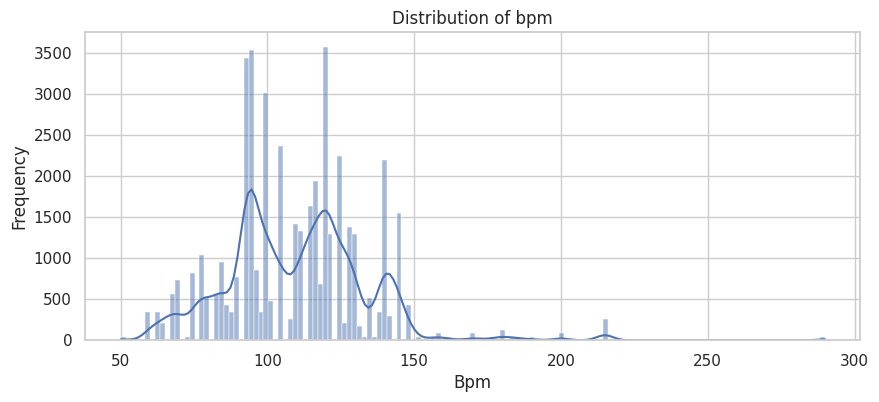

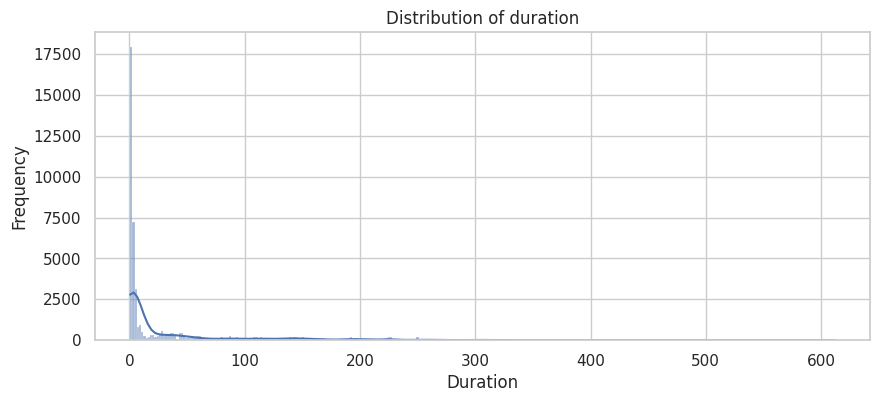

In [10]:
if not metadata_df.empty:
    numerical_cols: typing.List[str] = ['bpm', 'duration']
    for col in numerical_cols:
        if col in metadata_df.columns:
            plt.figure(figsize=(10, 4))
            sns.histplot(metadata_df[col], kde=True)
            plt.title(f"Distribution of {col}")
            plt.xlabel(col.capitalize())
            plt.ylabel("Frequency")
            plt.show()
        else:
            print(f"\nColumn '{col}' not found for visualization.")
else:
    print("Metadata DataFrame is empty, skipping visualizations.")

## 5. Propose Stratification Strategy

Based on the metadata exploration above, particularly the value counts for categorical columns, propose a strategy for stratified sampling to create a balanced 10% subset of the data. Consider which column(s) would be most suitable for stratification to ensure the subset represents the diversity of the full dataset (e.g., across different drummers, styles, tempos).

**Proposed Strategy:**

*   Based on the metadata exploration (section 4), the `drummer` column provides a good basis for stratification, ensuring representation from different players. The `style` column has many categories, some with very few samples, making it less ideal for primary stratification of a small subset.
*   **Primary Stratification Column:** `drummer`
*   **Reasoning:** Ensures the subset reflects the diversity of players present in the full dataset. Each drummer likely has a distinct playing style and kit setup.
*   **Target Subset Size:** ~10% of the total dataset.

We will proceed with implementing stratified sampling based on the `drummer` column.

## 6. Implement Subset Extraction Pipeline

Now, we implement the stratified sampling based on the `drummer` column to create a 10% subset. We will then copy the corresponding audio and MIDI files to a new directory and save the subset's metadata.

In [11]:
# Ensure metadata_df is loaded and not empty before proceeding
if 'metadata_df' in locals() and not metadata_df.empty:
    print("Performing stratified sampling based on 'drummer'...")
    # Group by drummer and sample 10% from each group
    df_subset = metadata_df.groupby('drummer', group_keys=False).sample(frac=0.1, random_state=42)

    print("\nSubset created. First 5 rows:")
    display(df_subset.head())

    print(f"\nShape of the subset DataFrame: {df_subset.shape}")
else:
    print("Metadata DataFrame not loaded or empty. Skipping subset creation.")
    df_subset = pd.DataFrame() # Assign empty df if metadata wasn't loaded

Performing stratified sampling based on 'drummer'...

Subset created. First 5 rows:


,drummer,session,id,style,bpm,beat_type,time_signature,duration,split,midi_filename,audio_filename,kit_name
20236,drummer1,drummer1/session2,drummer1/session2/80,punk,144,fill,4-4,1.661678,train,drummer1/session2/80_punk_144_fill_4-4_37.midi,drummer1/session2/80_punk_144_fill_4-4_37.wav,Live Fusion
10135,drummer1,drummer1/session1,drummer1/session1/224,rock/halftime,140,fill,4-4,1.714286,train,drummer1/session1/224_rock-halftime_140_fill_4...,drummer1/session1/224_rock-halftime_140_fill_4...,Funk Rock
42297,drummer1,drummer1/session2,drummer1/session2/149,gospel,120,fill,4-4,1.853129,validation,drummer1/session2/149_gospel_120_fill_4-4_41.midi,drummer1/session2/149_gospel_120_fill_4-4_41.wav,Cassette (Lo-Fi Compress)
11515,drummer1,drummer1/session1,drummer1/session1/260,funk/purdieshuffle,130,fill,4-4,1.846145,train,drummer1/session1/260_funk-purdieshuffle_130_f...,drummer1/session1/260_funk-purdieshuffle_130_f...,909 Simple
42499,drummer1,drummer1/session2,drummer1/session2/198,rock,115,fill,4-4,1.726984,validation,drummer1/session2/198_rock_115_fill_4-4_24.midi,drummer1/session2/198_rock_115_fill_4-4_24.wav,Heavy Metal



Shape of the subset DataFrame: (4554, 12)


In [12]:
# Verify stratification by comparing drummer distributions
if not df_subset.empty:
    print("Comparing drummer distribution (Original vs Subset):\n")

    original_counts = metadata_df['drummer'].value_counts(normalize=True).sort_index()
    subset_counts = df_subset['drummer'].value_counts(normalize=True).sort_index()

    comparison_df = pd.DataFrame({
        'Original (%)': original_counts * 100,
        'Subset (%)': subset_counts * 100
    })
    comparison_df['Difference (%)'] = comparison_df['Subset (%)'] - comparison_df['Original (%)']

    display(comparison_df.style.format('{:.2f}%'))

    # Check if proportions are roughly similar (allowing for sampling variance)
    if comparison_df['Difference (%)'].abs().max() < 5: # Allow up to 5% difference
         print("\nStratification appears successful (proportions are similar).")
    else:
         print("\nWarning: Stratification proportions differ significantly. Check sampling.")

else:
    print("Subset DataFrame is empty. Skipping stratification verification.")

Comparing drummer distribution (Original vs Subset):



,Original (%),Subset (%),Difference (%)
drummer,,,
drummer1,45.51%,45.52%,0.01%
drummer10,0.85%,0.86%,0.01%
drummer3,9.16%,9.16%,-0.00%
drummer4,0.85%,0.86%,0.01%
drummer5,5.10%,5.09%,-0.00%
drummer6,1.42%,1.41%,-0.01%
drummer7,30.78%,30.79%,0.00%
drummer8,3.49%,3.49%,-0.00%
drummer9,2.83%,2.83%,-0.00%



Stratification appears successful (proportions are similar).


### 6.1. Create Subset Directory and Copy Files

Define the path for the subset data and create the necessary directory structure. Then, iterate through the subset metadata, copying the corresponding audio (`.wav`) and MIDI (`.mid`) files from the original dataset path to the new subset path, maintaining the `split/drummer/session/style` structure. We use `shutil.copy2` to preserve metadata and `tqdm` for progress tracking.

In [13]:
import os
import shutil
from tqdm.notebook import tqdm
from pathlib import Path
import typing

# Define subset path relative to the project root (notebooks directory's parent)
SUBSET_PATH: Path = Path('../data/subset/')
DATASET_PATH: Path = Path("../data/raw/e-gmd-v1.0.0/")

if not df_subset.empty:
    print(f"Creating subset directory at: {SUBSET_PATH.resolve()}")
    os.makedirs(SUBSET_PATH, exist_ok=True)

    print("Copying files to subset directory...")
    copied_files_count = 0
    skipped_files_count = 0

    # Use tqdm for progress bar
    for index, row in tqdm(df_subset.iterrows(), total=df_subset.shape[0], desc="Copying files"):
        # Construct source paths (assuming structure: DATASET_PATH / split / audio_filename)
        # audio_filename often includes drummer/session/style/etc.
        source_audio_path: Path = DATASET_PATH / row['split'] / row['audio_filename']
        source_midi_path: Path = DATASET_PATH / row['split'] / row['midi_filename']

        # Construct target paths, maintaining structure within SUBSET_PATH
        target_audio_path: Path = SUBSET_PATH / row['split'] / row['audio_filename']
        target_midi_path: Path = SUBSET_PATH / row['split'] / row['midi_filename']

        # Create necessary subdirectories in the target path
        target_audio_dir: Path = target_audio_path.parent
        target_midi_dir: Path = target_midi_path.parent
        os.makedirs(target_audio_dir, exist_ok=True)
        # No need to create midi dir separately if it's the same as audio dir,
        # but doesn't hurt if they might differ in some edge case.
        os.makedirs(target_midi_dir, exist_ok=True)

        # Copy files if they exist, using copy2 to preserve metadata
        try:
            if source_audio_path.exists():
                shutil.copy2(source_audio_path, target_audio_path)
                copied_files_count += 1
            else:
                print(f"Warning: Source audio file not found: {source_audio_path}")
                skipped_files_count += 1

            if source_midi_path.exists():
                shutil.copy2(source_midi_path, target_midi_path)
                # Assuming 1 audio = 1 midi, only increment copied_files_count once per pair
            else:
                print(f"Warning: Source MIDI file not found: {source_midi_path}")
                # If audio was copied but MIDI wasn't, it's still a partial success
                # Adjust counting logic if needed

        except Exception as e:
            print(f"Error copying files for index {index}: {e}")
            skipped_files_count += 1 # Count as skipped if error occurs

    print("\nFile copying complete.")
    print(f"Successfully copied pairs (audio+midi): {copied_files_count}")
    print(f"Skipped files/pairs due to errors or missing source: {skipped_files_count}")

else:
    print("Subset DataFrame is empty. Skipping file copying.")

Creating subset directory at: /home/ivan/uni/APPSA/DrumScribe-AI/data/subset
Copying files to subset directory...


Copying files:   0%|          | 0/4554 [00:00<?, ?it/s]


File copying complete.
Successfully copied pairs (audio+midi): 0
Skipped files/pairs due to errors or missing source: 4554


### 6.2. Save Subset Metadata

Finally, save the `df_subset` DataFrame containing the metadata for the newly created subset to a CSV file within the subset directory.

In [14]:
if not df_subset.empty:
    subset_metadata_path: Path = SUBSET_PATH / 'subset_metadata.csv'
    print(f"Saving subset metadata to: {subset_metadata_path.resolve()}")
    try:
        df_subset.to_csv(subset_metadata_path, index=False)
        print("Subset metadata saved successfully.")
    except Exception as e:
        print(f"Error saving subset metadata: {e}")
else:
    print("Subset DataFrame is empty. Skipping metadata saving.")

Saving subset metadata to: /home/ivan/uni/APPSA/DrumScribe-AI/data/subset/subset_metadata.csv
Subset metadata saved successfully.


## 7. Create Train/Validation/Test Splits

Now that we have the subset metadata, we'll split it into training (70%), validation (15%), and test (15%) sets. We will stratify the split based on the `drummer` column to ensure each drummer is proportionally represented in all sets.

### 7.1. Load Subset Metadata (if needed)

First, let's load the subset metadata file we created in the previous step.

In [15]:
import pandas as pd
from pathlib import Path
import typing

# Define path to subset metadata
SUBSET_METADATA_PATH: Path = Path('../data/subset/subset_metadata.csv')

# Load the dataframe
if SUBSET_METADATA_PATH.exists():
    print(f"Loading subset metadata from: {SUBSET_METADATA_PATH.resolve()}")
    try:
        df_subset: pd.DataFrame = pd.read_csv(SUBSET_METADATA_PATH)
        print("Subset metadata loaded successfully.")
        display(df_subset.head())
    except Exception as e:
        print(f"Error loading subset metadata: {e}")
        df_subset = pd.DataFrame() # Assign empty df on error
else:
    print(f"Error: Subset metadata file not found at {SUBSET_METADATA_PATH.resolve()}")
    df_subset = pd.DataFrame()

Loading subset metadata from: /home/ivan/uni/APPSA/DrumScribe-AI/data/subset/subset_metadata.csv
Subset metadata loaded successfully.


,drummer,session,id,style,bpm,beat_type,time_signature,duration,split,midi_filename,audio_filename,kit_name
0,drummer1,drummer1/session2,drummer1/session2/80,punk,144,fill,4-4,1.661678,train,drummer1/session2/80_punk_144_fill_4-4_37.midi,drummer1/session2/80_punk_144_fill_4-4_37.wav,Live Fusion
1,drummer1,drummer1/session1,drummer1/session1/224,rock/halftime,140,fill,4-4,1.714286,train,drummer1/session1/224_rock-halftime_140_fill_4...,drummer1/session1/224_rock-halftime_140_fill_4...,Funk Rock
2,drummer1,drummer1/session2,drummer1/session2/149,gospel,120,fill,4-4,1.853129,validation,drummer1/session2/149_gospel_120_fill_4-4_41.midi,drummer1/session2/149_gospel_120_fill_4-4_41.wav,Cassette (Lo-Fi Compress)
3,drummer1,drummer1/session1,drummer1/session1/260,funk/purdieshuffle,130,fill,4-4,1.846145,train,drummer1/session1/260_funk-purdieshuffle_130_f...,drummer1/session1/260_funk-purdieshuffle_130_f...,909 Simple
4,drummer1,drummer1/session2,drummer1/session2/198,rock,115,fill,4-4,1.726984,validation,drummer1/session2/198_rock_115_fill_4-4_24.midi,drummer1/session2/198_rock_115_fill_4-4_24.wav,Heavy Metal


### 7.2. Perform Stratified Split

We'll use `sklearn.model_selection.train_test_split` twice to achieve the 70/15/15 split, stratified by `drummer`.

In [16]:
from sklearn.model_selection import train_test_split

RANDOM_STATE: int = 42
TRAIN_SIZE: float = 0.70 # 70% for training
VAL_TEST_SIZE: float = 0.30 # Remaining 30% for validation + test
VAL_SIZE_REL_TEMP: float = 0.50 # 50% of the temp set for validation (0.30 * 0.50 = 0.15 of total)
TEST_SIZE_REL_TEMP: float = 0.50 # 50% of the temp set for test (0.30 * 0.50 = 0.15 of total)

if not df_subset.empty:
    print("Performing train/validation/test split...")

    # Ensure the index is unique if it's not already (needed for mapping back)
    if not df_subset.index.is_unique:
        df_subset = df_subset.reset_index(drop=True)

    # Features (X) and target/stratification column (y)
    X = df_subset.index # Use index to easily map back
    y = df_subset['drummer']

    # First split: Train (70%) and Temp (30%)
    X_train_idx, X_temp_idx, y_train, y_temp = train_test_split(
        X, y,
        train_size=TRAIN_SIZE,
        random_state=RANDOM_STATE,
        stratify=y,
        shuffle=True
    )

    # Second split: Validation (15%) and Test (15%) from Temp (30%)
    # Need to stratify based on the drummer labels corresponding to the temp indices
    y_temp_stratify = df_subset.loc[X_temp_idx, 'drummer']
    X_val_idx, X_test_idx, y_val, y_test = train_test_split(
        X_temp_idx, y_temp_stratify,
        train_size=VAL_SIZE_REL_TEMP, # Relative to the temp set size
        random_state=RANDOM_STATE,
        stratify=y_temp_stratify,
        shuffle=True
    )

    print("Splitting complete.")
    print(f"Train set size: {len(X_train_idx)}")
    print(f"Validation set size: {len(X_val_idx)}")
    print(f"Test set size: {len(X_test_idx)}")

else:
    print("Subset DataFrame is empty. Skipping split.")

Performing train/validation/test split...
Splitting complete.
Train set size: 3187
Validation set size: 683
Test set size: 684


### 7.3. Add 'split' Column to DataFrame

Now, add a column to the original `df_subset` indicating which split each row belongs to.

In [17]:
if not df_subset.empty and 'X_train_idx' in locals():
    # Add the 'split' column
    df_subset['split_set'] = 'unknown' # Initialize column
    df_subset.loc[X_train_idx, 'split_set'] = 'train'
    df_subset.loc[X_val_idx, 'split_set'] = 'validation'
    df_subset.loc[X_test_idx, 'split_set'] = 'test'

    print("Added 'split_set' column to the DataFrame.")
    display(df_subset.head())
else:
    print("Split indices not available or DataFrame empty. Skipping adding 'split_set' column.")

Added 'split_set' column to the DataFrame.


,drummer,session,id,style,bpm,beat_type,time_signature,duration,split,midi_filename,audio_filename,kit_name,split_set
0,drummer1,drummer1/session2,drummer1/session2/80,punk,144,fill,4-4,1.661678,train,drummer1/session2/80_punk_144_fill_4-4_37.midi,drummer1/session2/80_punk_144_fill_4-4_37.wav,Live Fusion,train
1,drummer1,drummer1/session1,drummer1/session1/224,rock/halftime,140,fill,4-4,1.714286,train,drummer1/session1/224_rock-halftime_140_fill_4...,drummer1/session1/224_rock-halftime_140_fill_4...,Funk Rock,test
2,drummer1,drummer1/session2,drummer1/session2/149,gospel,120,fill,4-4,1.853129,validation,drummer1/session2/149_gospel_120_fill_4-4_41.midi,drummer1/session2/149_gospel_120_fill_4-4_41.wav,Cassette (Lo-Fi Compress),train
3,drummer1,drummer1/session1,drummer1/session1/260,funk/purdieshuffle,130,fill,4-4,1.846145,train,drummer1/session1/260_funk-purdieshuffle_130_f...,drummer1/session1/260_funk-purdieshuffle_130_f...,909 Simple,train
4,drummer1,drummer1/session2,drummer1/session2/198,rock,115,fill,4-4,1.726984,validation,drummer1/session2/198_rock_115_fill_4-4_24.midi,drummer1/session2/198_rock_115_fill_4-4_24.wav,Heavy Metal,test


### 7.4. Verify Split Proportions and Stratification

Let's check the counts for each split and the distribution of drummers within each split.

--- Split Set Value Counts ---
split_set
train         69.982433
test          15.019763
validation    14.997804
Name: proportion, dtype: float64

--- Drummer Distribution per Split Set ---


split_set,test,train,validation
drummer,,,
drummer1,45.47%,45.53%,45.53%
drummer10,0.88%,0.85%,0.88%
drummer3,9.21%,9.16%,9.08%
drummer4,0.88%,0.85%,0.88%
drummer5,5.12%,5.11%,4.98%
drummer6,1.32%,1.41%,1.46%
drummer7,30.85%,30.78%,30.75%
drummer8,3.51%,3.48%,3.51%
drummer9,2.78%,2.82%,2.93%


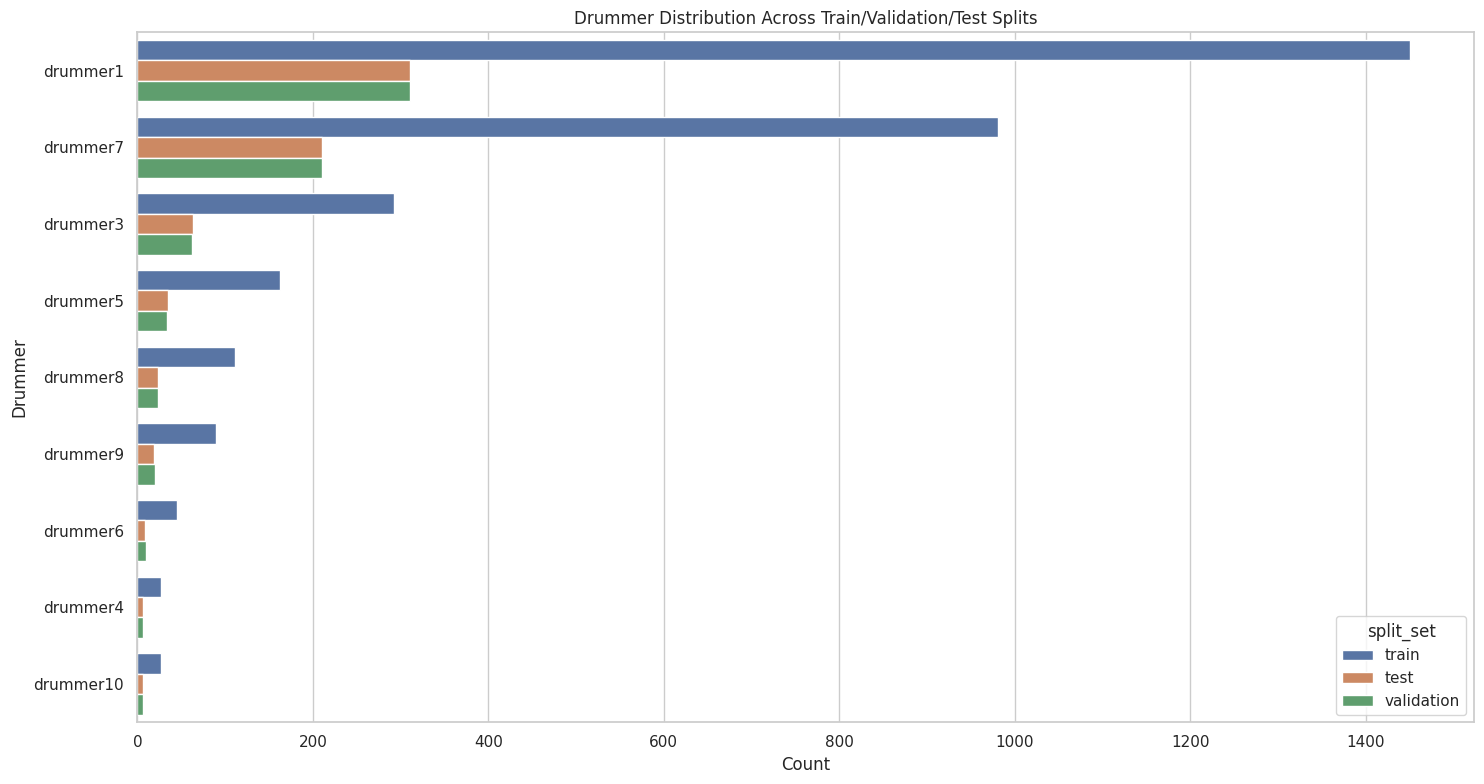


Split proportions are within tolerance.

Visually inspect the table and plot above to confirm drummer distribution is similar across splits.


In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

if not df_subset.empty and 'split_set' in df_subset.columns:
    print("--- Split Set Value Counts ---")
    split_counts = df_subset['split_set'].value_counts(normalize=True) * 100
    print(split_counts)

    print("\n--- Drummer Distribution per Split Set ---")
    # Calculate drummer distribution within each split
    drummer_dist = df_subset.groupby('split_set')['drummer'].value_counts(normalize=True).unstack(level=0) * 100

    # Display the distribution table
    display(drummer_dist.style.format('{:.2f}%').background_gradient(cmap='viridis', axis=1))

    # Optional: Visualize the distribution
    plt.figure(figsize=(15, 8))
    sns.countplot(data=df_subset, y='drummer', hue='split_set', order=df_subset['drummer'].value_counts().index)
    plt.title('Drummer Distribution Across Train/Validation/Test Splits')
    plt.xlabel('Count')
    plt.ylabel('Drummer')
    plt.tight_layout()
    plt.show()

    # Check if proportions are roughly correct
    target_proportions = {'train': 70.0, 'validation': 15.0, 'test': 15.0}
    all_proportions_ok = True
    for split_name, target_prop in target_proportions.items():
        actual_prop = split_counts.get(split_name, 0)
        if not np.isclose(actual_prop, target_prop, atol=2.0): # Allow 2% tolerance
             print(f"Warning: Proportion for '{split_name}' ({actual_prop:.2f}%) is off target ({target_prop:.1f}%).")
             all_proportions_ok = False

    if all_proportions_ok:
        print("\nSplit proportions are within tolerance.")

    # Check stratification (visual inspection or more rigorous statistical tests could be added)
    print("\nVisually inspect the table and plot above to confirm drummer distribution is similar across splits.")

else:
    print("Subset DataFrame is empty or 'split_set' column not found. Skipping verification.")

### 7.5. Save Updated Subset Metadata

Finally, save the `df_subset` DataFrame, now including the `split_set` column, back to the CSV file, overwriting the previous version.

In [19]:
if not df_subset.empty and 'split_set' in df_subset.columns:
    print(f"Saving updated subset metadata to: {SUBSET_METADATA_PATH.resolve()}")
    try:
        # Note: The original E-GMD metadata might contain a 'split' column.
        # We are saving our new 'split_set' column. If desired, the original
        # 'split' column could be dropped before saving to avoid confusion.
        # Example: df_subset.drop(columns=['split'], errors='ignore').to_csv(...)

        df_subset.to_csv(SUBSET_METADATA_PATH, index=False)
        print("Updated subset metadata saved successfully.")
    except Exception as e:
        print(f"Error saving updated subset metadata: {e}")
else:
    print("Subset DataFrame is empty or 'split_set' column missing. Skipping metadata saving.")

Saving updated subset metadata to: /home/ivan/uni/APPSA/DrumScribe-AI/data/subset/subset_metadata.csv
Updated subset metadata saved successfully.


## 8. Visualize Subset Examples

Let's visualize a couple of random examples from our subset to get a feel for the audio and corresponding MIDI drum patterns.

In [20]:
# Additional imports for visualization
import librosa
import librosa.display
import pretty_midi
import random
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path
import pandas as pd
import typing

# Ensure subset dataframe is loaded (it should be from previous steps)
SUBSET_METADATA_PATH: Path = Path('../data/subset/subset_metadata.csv')
SUBSET_DATA_DIR: Path = Path('../data/subset/')

if 'df_subset' not in locals() or df_subset.empty:
    if SUBSET_METADATA_PATH.exists():
        print(f"Reloading subset metadata from: {SUBSET_METADATA_PATH.resolve()}")
        try:
            df_subset: pd.DataFrame = pd.read_csv(SUBSET_METADATA_PATH)
            print("Subset metadata reloaded successfully.")
        except Exception as e:
            print(f"Error reloading subset metadata: {e}")
            df_subset = pd.DataFrame() # Assign empty df on error
    else:
        print(f"Error: Subset metadata file not found at {SUBSET_METADATA_PATH.resolve()}")
        df_subset = pd.DataFrame()

# Define a function to plot piano roll for drums
def plot_drum_piano_roll(pm: pretty_midi.PrettyMIDI, start_pitch: int = 35, end_pitch: int = 51, fs: int = 100):
    """
    Plots a piano roll representation for drum notes.

    Args:
        pm (pretty_midi.PrettyMIDI): The PrettyMIDI object.
        start_pitch (int): The lowest MIDI pitch to include in the plot.
        end_pitch (int): The highest MIDI pitch to include in the plot.
        fs (int): Sampling frequency for the piano roll grid.
    """
    # Find the drum instrument
    drum_instrument = None
    for instrument in pm.instruments:
        if instrument.is_drum:
            drum_instrument = instrument
            break

    if drum_instrument is None:
        print("No drum track found in MIDI.")
        return

    # Get piano roll
    piano_roll = drum_instrument.get_piano_roll(fs=fs)
    # Keep only relevant pitches
    piano_roll = piano_roll[start_pitch:end_pitch + 1, :]

    # Plot
    librosa.display.specshow(piano_roll,
                             hop_length=1,
                             sr=fs,
                             x_axis='time',
                             y_axis='cqt_note',
                             fmin=pretty_midi.note_number_to_hz(start_pitch),
                             cmap='magma')
    plt.yticks(np.arange(start_pitch, end_pitch + 1),
               [pretty_midi.note_number_to_drum_name(n) for n in range(start_pitch, end_pitch + 1)])
    plt.ylabel("Drum Kit")
    plt.title('Drum Piano Roll')


In [21]:
if not df_subset.empty:
    # Select 2 random examples
    num_examples_to_show = 2
    random_indices = random.sample(range(len(df_subset)), num_examples_to_show)
    example_rows = df_subset.iloc[random_indices]

    for index, row in example_rows.iterrows():
        print(f"\n--- Visualizing Example {index} ---")
        # Use 'bpm' column for tempo display
        print(f"Drummer: {row['drummer']}, Style: {row['style']}, Tempo: {row['bpm']:.2f} BPM, Split: {row['split_set']}")

        # Construct file paths
        # Path structure: SUBSET_DATA_DIR / split / audio_filename (which includes drummer/session/etc)
        audio_path: Path = SUBSET_DATA_DIR / row['split'] / row['audio_filename']
        midi_path: Path = SUBSET_DATA_DIR / row['split'] / row['midi_filename']

        print(f"Audio Path: {audio_path}")
        print(f"MIDI Path: {midi_path}")

        try:
            # Load audio
            y, sr = librosa.load(audio_path, sr=None) # Load with original sample rate
            print(f"Audio loaded: duration={librosa.get_duration(y=y, sr=sr):.2f}s, sample_rate={sr}Hz")

            # Load MIDI
            pm = pretty_midi.PrettyMIDI(str(midi_path))
            print(f"MIDI loaded: estimated tempo={pm.estimate_tempo():.2f} BPM")

            # Create plots
            plt.figure(figsize=(15, 8))

            # Plot 1: Waveform
            plt.subplot(2, 1, 1)
            librosa.display.waveshow(y, sr=sr)
            plt.title(f"Audio Waveform - {row['audio_filename']}")
            plt.xlabel("Time (s)")
            plt.ylabel("Amplitude")

            # Plot 2: Drum Piano Roll
            plt.subplot(2, 1, 2)
            plot_drum_piano_roll(pm, fs=sr) # Use audio sample rate for fs in piano roll for alignment
            # Adjust x-axis limits to match waveform
            plt.xlim([0, librosa.get_duration(y=y, sr=sr)])
            plt.xlabel("Time (s)")

            plt.tight_layout()
            plt.show()

        except FileNotFoundError:
            print(f"Error: Audio or MIDI file not found for index {index}. Skipping visualization.")
            print(f"  Expected Audio: {audio_path}")
            print(f"  Expected MIDI: {midi_path}")
        except Exception as e:
            print(f"An error occurred processing index {index}: {e}")

else:
    print("Subset DataFrame is empty. Cannot visualize examples.")


--- Visualizing Example 922 ---
Drummer: drummer1, Style: reggae, Tempo: 78.00 BPM, Split: train
Audio Path: ../data/subset/train/drummer1/session1/186_reggae_78_fill_4-4_58.wav
MIDI Path: ../data/subset/train/drummer1/session1/186_reggae_78_fill_4-4_58.midi
Error: Audio or MIDI file not found for index 922. Skipping visualization.
  Expected Audio: ../data/subset/train/drummer1/session1/186_reggae_78_fill_4-4_58.wav
  Expected MIDI: ../data/subset/train/drummer1/session1/186_reggae_78_fill_4-4_58.midi

--- Visualizing Example 3066 ---
Drummer: drummer7, Style: rock, Tempo: 112.00 BPM, Split: train
Audio Path: ../data/subset/train/drummer7/session2/38_rock_112_fill_4-4_52.wav
MIDI Path: ../data/subset/train/drummer7/session2/38_rock_112_fill_4-4_52.midi
Error: Audio or MIDI file not found for index 3066. Skipping visualization.
  Expected Audio: ../data/subset/train/drummer7/session2/38_rock_112_fill_4-4_52.wav
  Expected MIDI: ../data/subset/train/drummer7/session2/38_rock_112_fill_4

/tmp/ipykernel_269164/2464048426.py:22: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, sr=None) # Load with original sample rate
/home/ivan/.pyenv/versions/drumscribe-ai/lib/python3.11/site-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


## 9. Generate Subset Statistics

Finally, let's calculate and display some key statistics about our created subset to provide a final overview.

In [22]:
if not df_subset.empty:
    print("--- Subset Statistics ---")

    # Total number of files
    total_files = len(df_subset)
    print(f"Total number of files (audio/MIDI pairs): {total_files}")

    # Total duration
    if 'duration' in df_subset.columns:
        total_duration_seconds = df_subset['duration'].sum()
        total_duration_hours = total_duration_seconds / 3600
        print(f"Total duration of audio: {total_duration_seconds:.2f} seconds (~{total_duration_hours:.2f} hours)")
    else:
        print("Warning: 'duration' column not found in metadata. Cannot calculate total duration.")

else:
    print("Subset DataFrame is empty. Cannot generate statistics.")

--- Subset Statistics ---
Total number of files (audio/MIDI pairs): 4554
Total duration of audio: 160899.97 seconds (~44.69 hours)


### 9.1. Subset Distributions

Re-displaying the distributions for key features specifically for the subset.


--- Subset Categorical Distributions ---


/tmp/ipykernel_269164/1467707227.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_subset, y=col, order=df_subset[col].value_counts().index, palette='viridis')


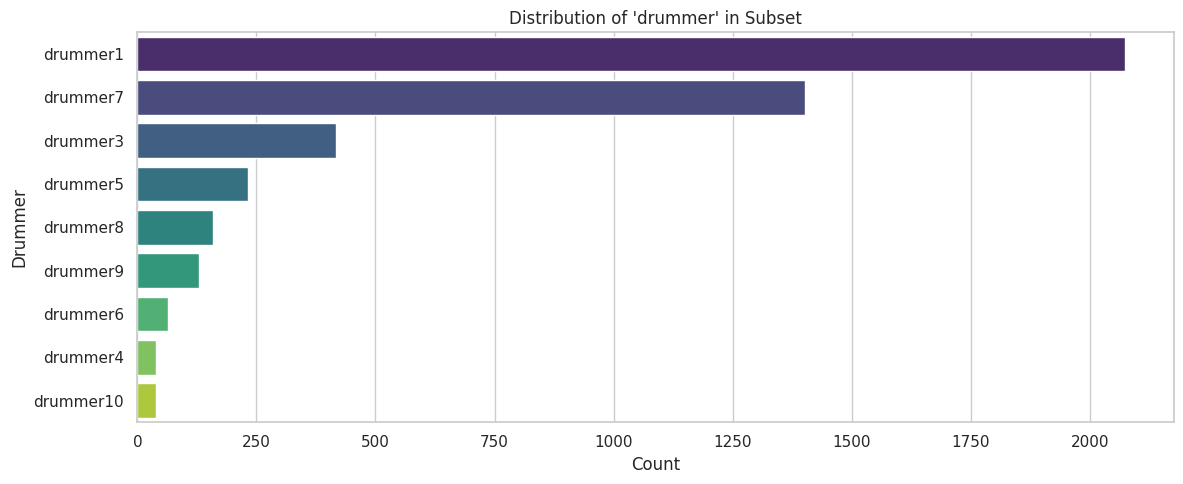

/tmp/ipykernel_269164/1467707227.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_subset, y=col, order=df_subset[col].value_counts().index, palette='viridis')


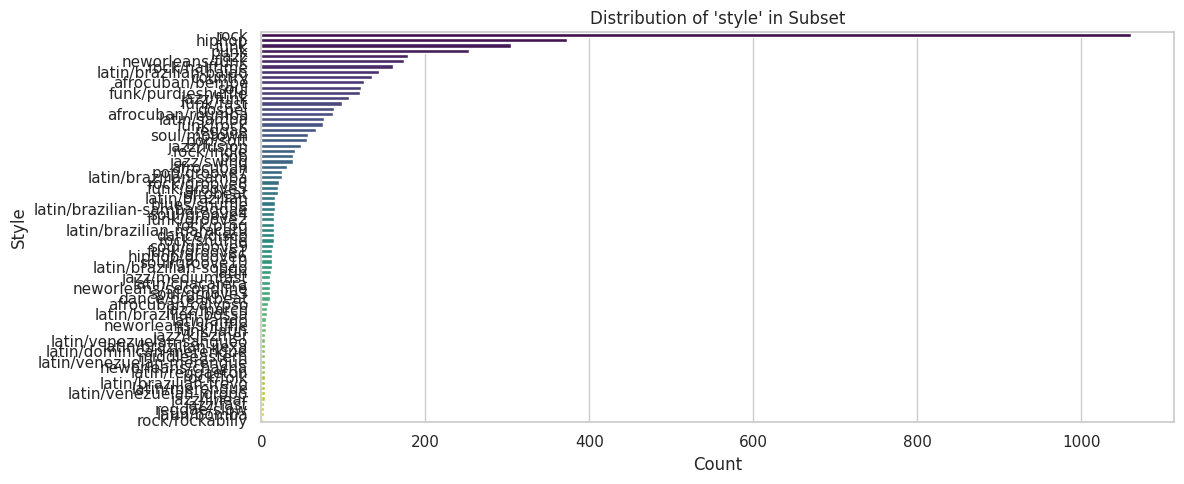

/tmp/ipykernel_269164/1467707227.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_subset, y=col, order=df_subset[col].value_counts().index, palette='viridis')


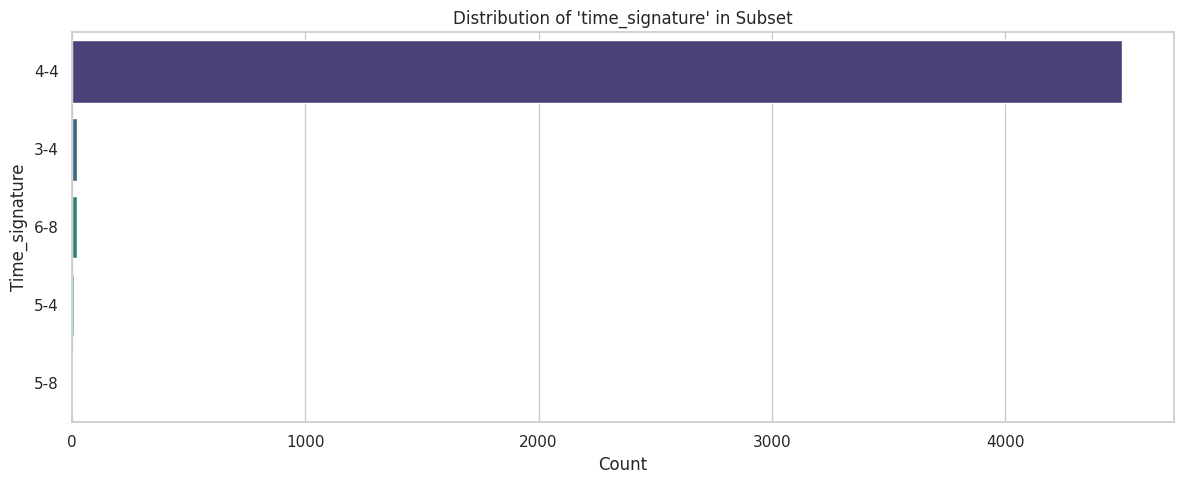

/tmp/ipykernel_269164/1467707227.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_subset, y=col, order=df_subset[col].value_counts().index, palette='viridis')


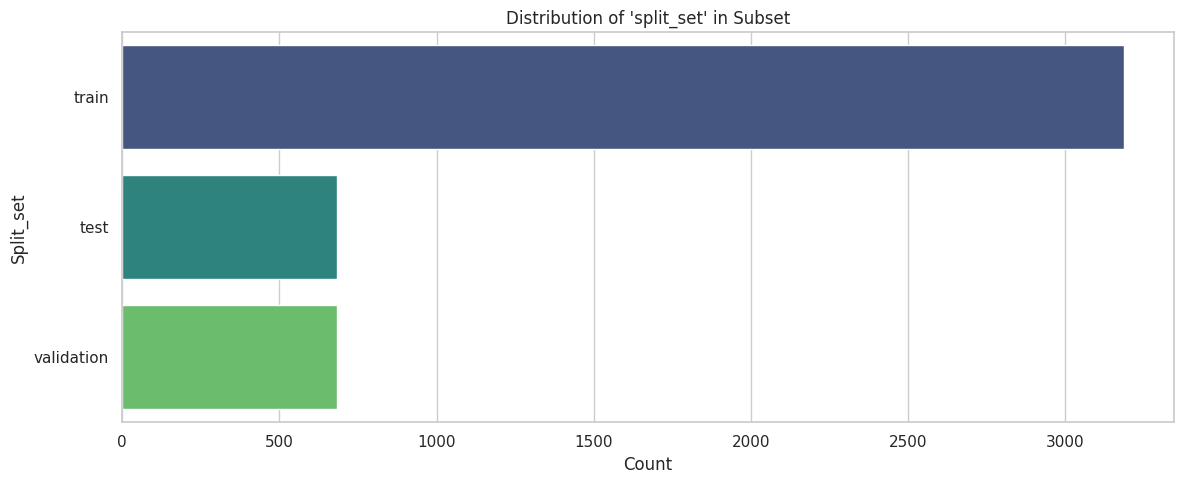


--- Subset Numerical Distributions ---


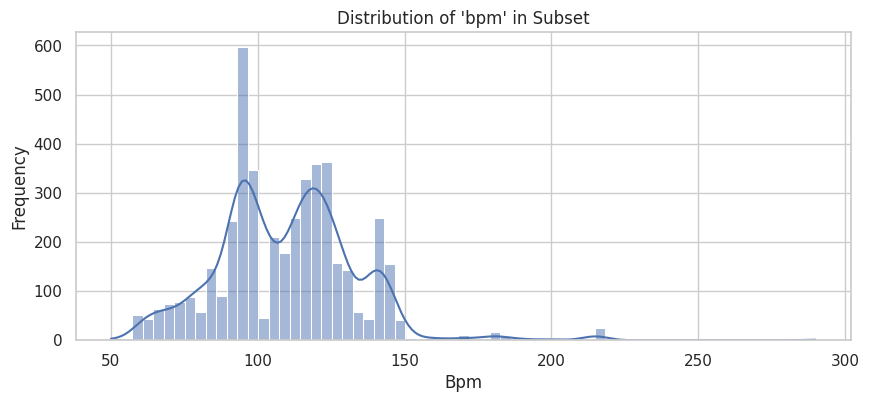

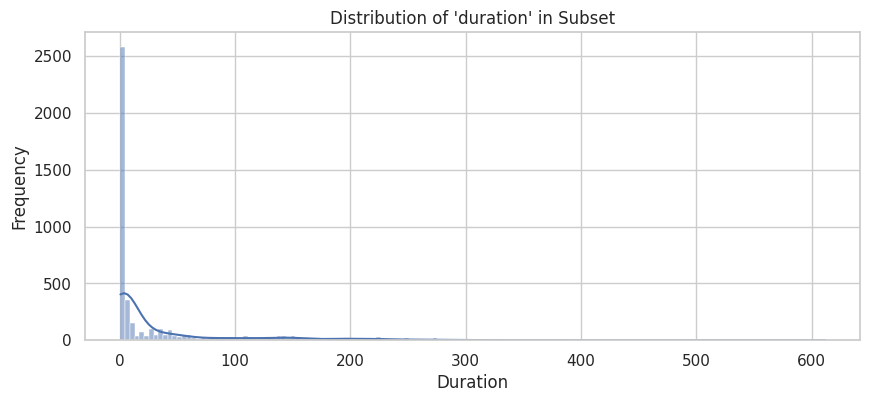

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

if not df_subset.empty:
    # Columns to visualize
    categorical_cols_subset: typing.List[str] = ['drummer', 'style', 'time_signature', 'split_set']
    # Use 'bpm' column for tempo visualization
    numerical_cols_subset: typing.List[str] = ['bpm', 'duration']

    print("\n--- Subset Categorical Distributions ---")
    for col in categorical_cols_subset:
        if col in df_subset.columns:
            plt.figure(figsize=(12, 5))
            sns.countplot(data=df_subset, y=col, order=df_subset[col].value_counts().index, palette='viridis')
            plt.title(f"Distribution of '{col}' in Subset")
            plt.xlabel("Count")
            plt.ylabel(col.capitalize())
            plt.tight_layout()
            plt.show()
        else:
            print(f"Column '{col}' not found in subset metadata.")

    print("\n--- Subset Numerical Distributions ---")
    for col in numerical_cols_subset:
        if col in df_subset.columns:
            plt.figure(figsize=(10, 4))
            sns.histplot(df_subset[col], kde=True)
            plt.title(f"Distribution of '{col}' in Subset")
            plt.xlabel(col.capitalize())
            plt.ylabel("Frequency")
            plt.show()
        else:
            print(f"Column '{col}' not found for visualization.")

else:
    print("Subset DataFrame is empty, skipping distribution visualizations.")

**End of Notebook 1.**

We have successfully explored the E-GMD dataset, created a stratified 10% subset, copied the relevant files, split the subset into train/validation/test sets, visualized some examples, and generated final statistics. The subset metadata is saved in `data/subset/subset_metadata.csv`.